#**CLASSIFICATION EXAMPLE USING IRIS DATASET**
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

In [96]:
# Import of libraries and iris dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


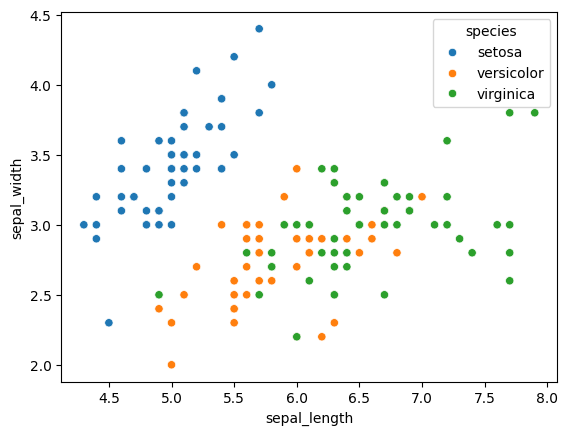

In [16]:
# Visual representation of Iris Dataset using sepal lenght and sepal widht as variables
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

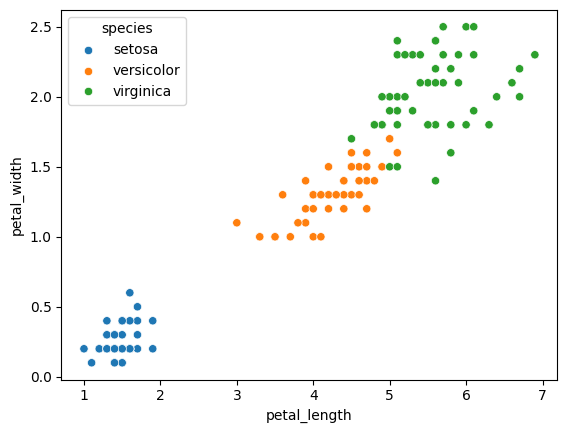

In [17]:
# Visual representation of Iris Dataset using petal length and petal width as variables
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.show()

In [20]:
#Separate predictors and target variable
X=iris.drop('species',axis=1)
y=iris['species']

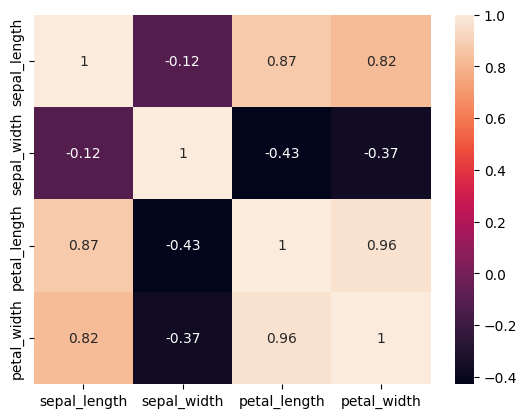

In [22]:
# Evaluate the correlation among the predictors
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


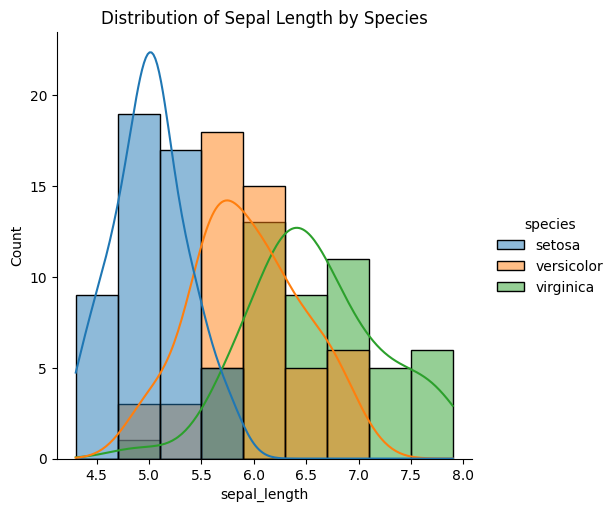

In [25]:
# Let's see the distributions of the 4 different variables by species

sns.displot(x='sepal_length', hue='species', data=iris, kde=True)
plt.title('Distribution of Sepal Length by Species')
plt.show()

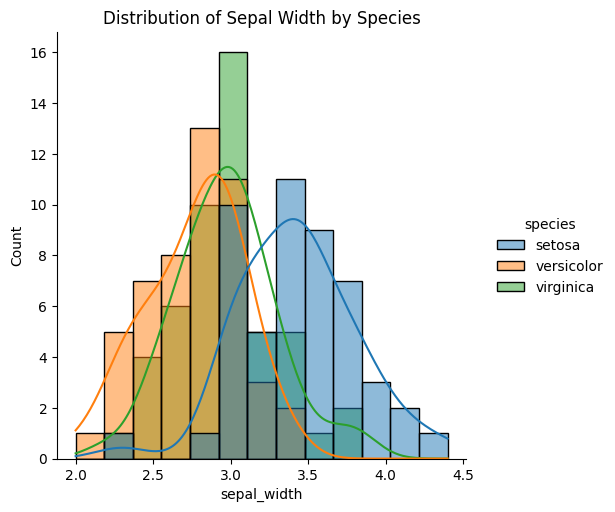

In [26]:
# Lets' see the distributions of the 4 different variables by species

sns.displot(x='sepal_width', hue='species', data=iris, kde=True)
plt.title('Distribution of Sepal Width by Species')
plt.show()

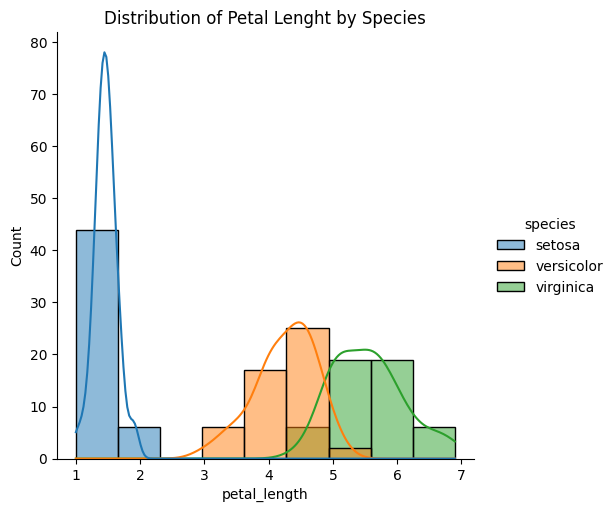

In [27]:
# Lets' see the distributions of the 4 different variables by species

sns.displot(x='petal_length', hue='species', data=iris, kde=True)
plt.title('Distribution of Petal Lenght by Species')
plt.show()

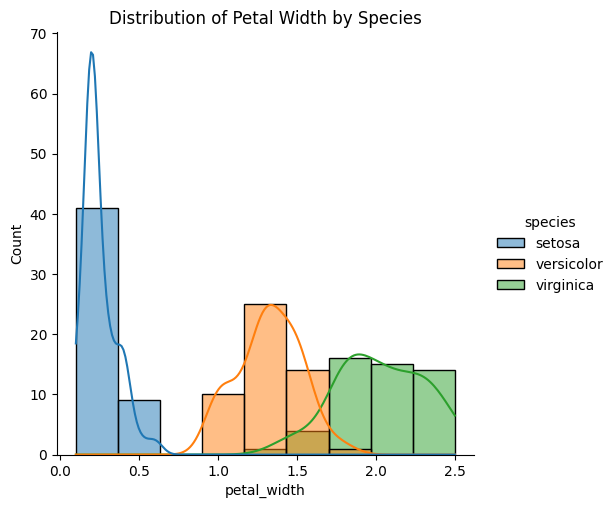

In [28]:
# Lets' see the distributions of the 4 different variables by species

sns.displot(x='petal_width', hue='species', data=iris, kde=True)
plt.title('Distribution of Petal Width by Species')
plt.show()

In [29]:
X = iris.drop('species', axis=1)
y = iris.species


In [86]:
# Creation of the first predictor using all the 4 dimensions
# Dataset partition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=None)



In [87]:
# Model creation and training
tree_model = DecisionTreeClassifier(criterion="gini", min_samples_leaf=10, random_state=12)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=12)

In [88]:
#Use the model to make the prediction
y_train_pred=tree_model.predict(X_train)
y_test_pred=tree_model.predict(X_test)

In [89]:
# Evaluation of accuracy
print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9642857142857143
Test accuracy: 0.9473684210526315


### **Comment to the accuracy score**
Accuracy measure the ratio of correct predictions over total prediction. Train accuracy is higher than test accuracy, a typical pattern. The slight difference indicate that there is neither underfitting nor overfitting.

In [91]:
# Classification report for the training dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.93      0.97      0.95        39
   virginica       0.97      0.92      0.95        39

    accuracy                           0.96       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.96      0.96       112



In [90]:
# Classification report for the test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.91      0.91      0.91        11
   virginica       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



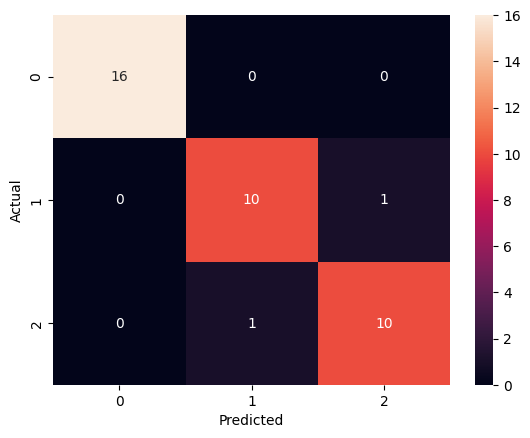

In [97]:
# Building the confusion matrix
cm_1 = confusion_matrix(y_test, y_test_pred)

# Plotting using seaborn to create a heatmap
sns.heatmap(cm_1, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

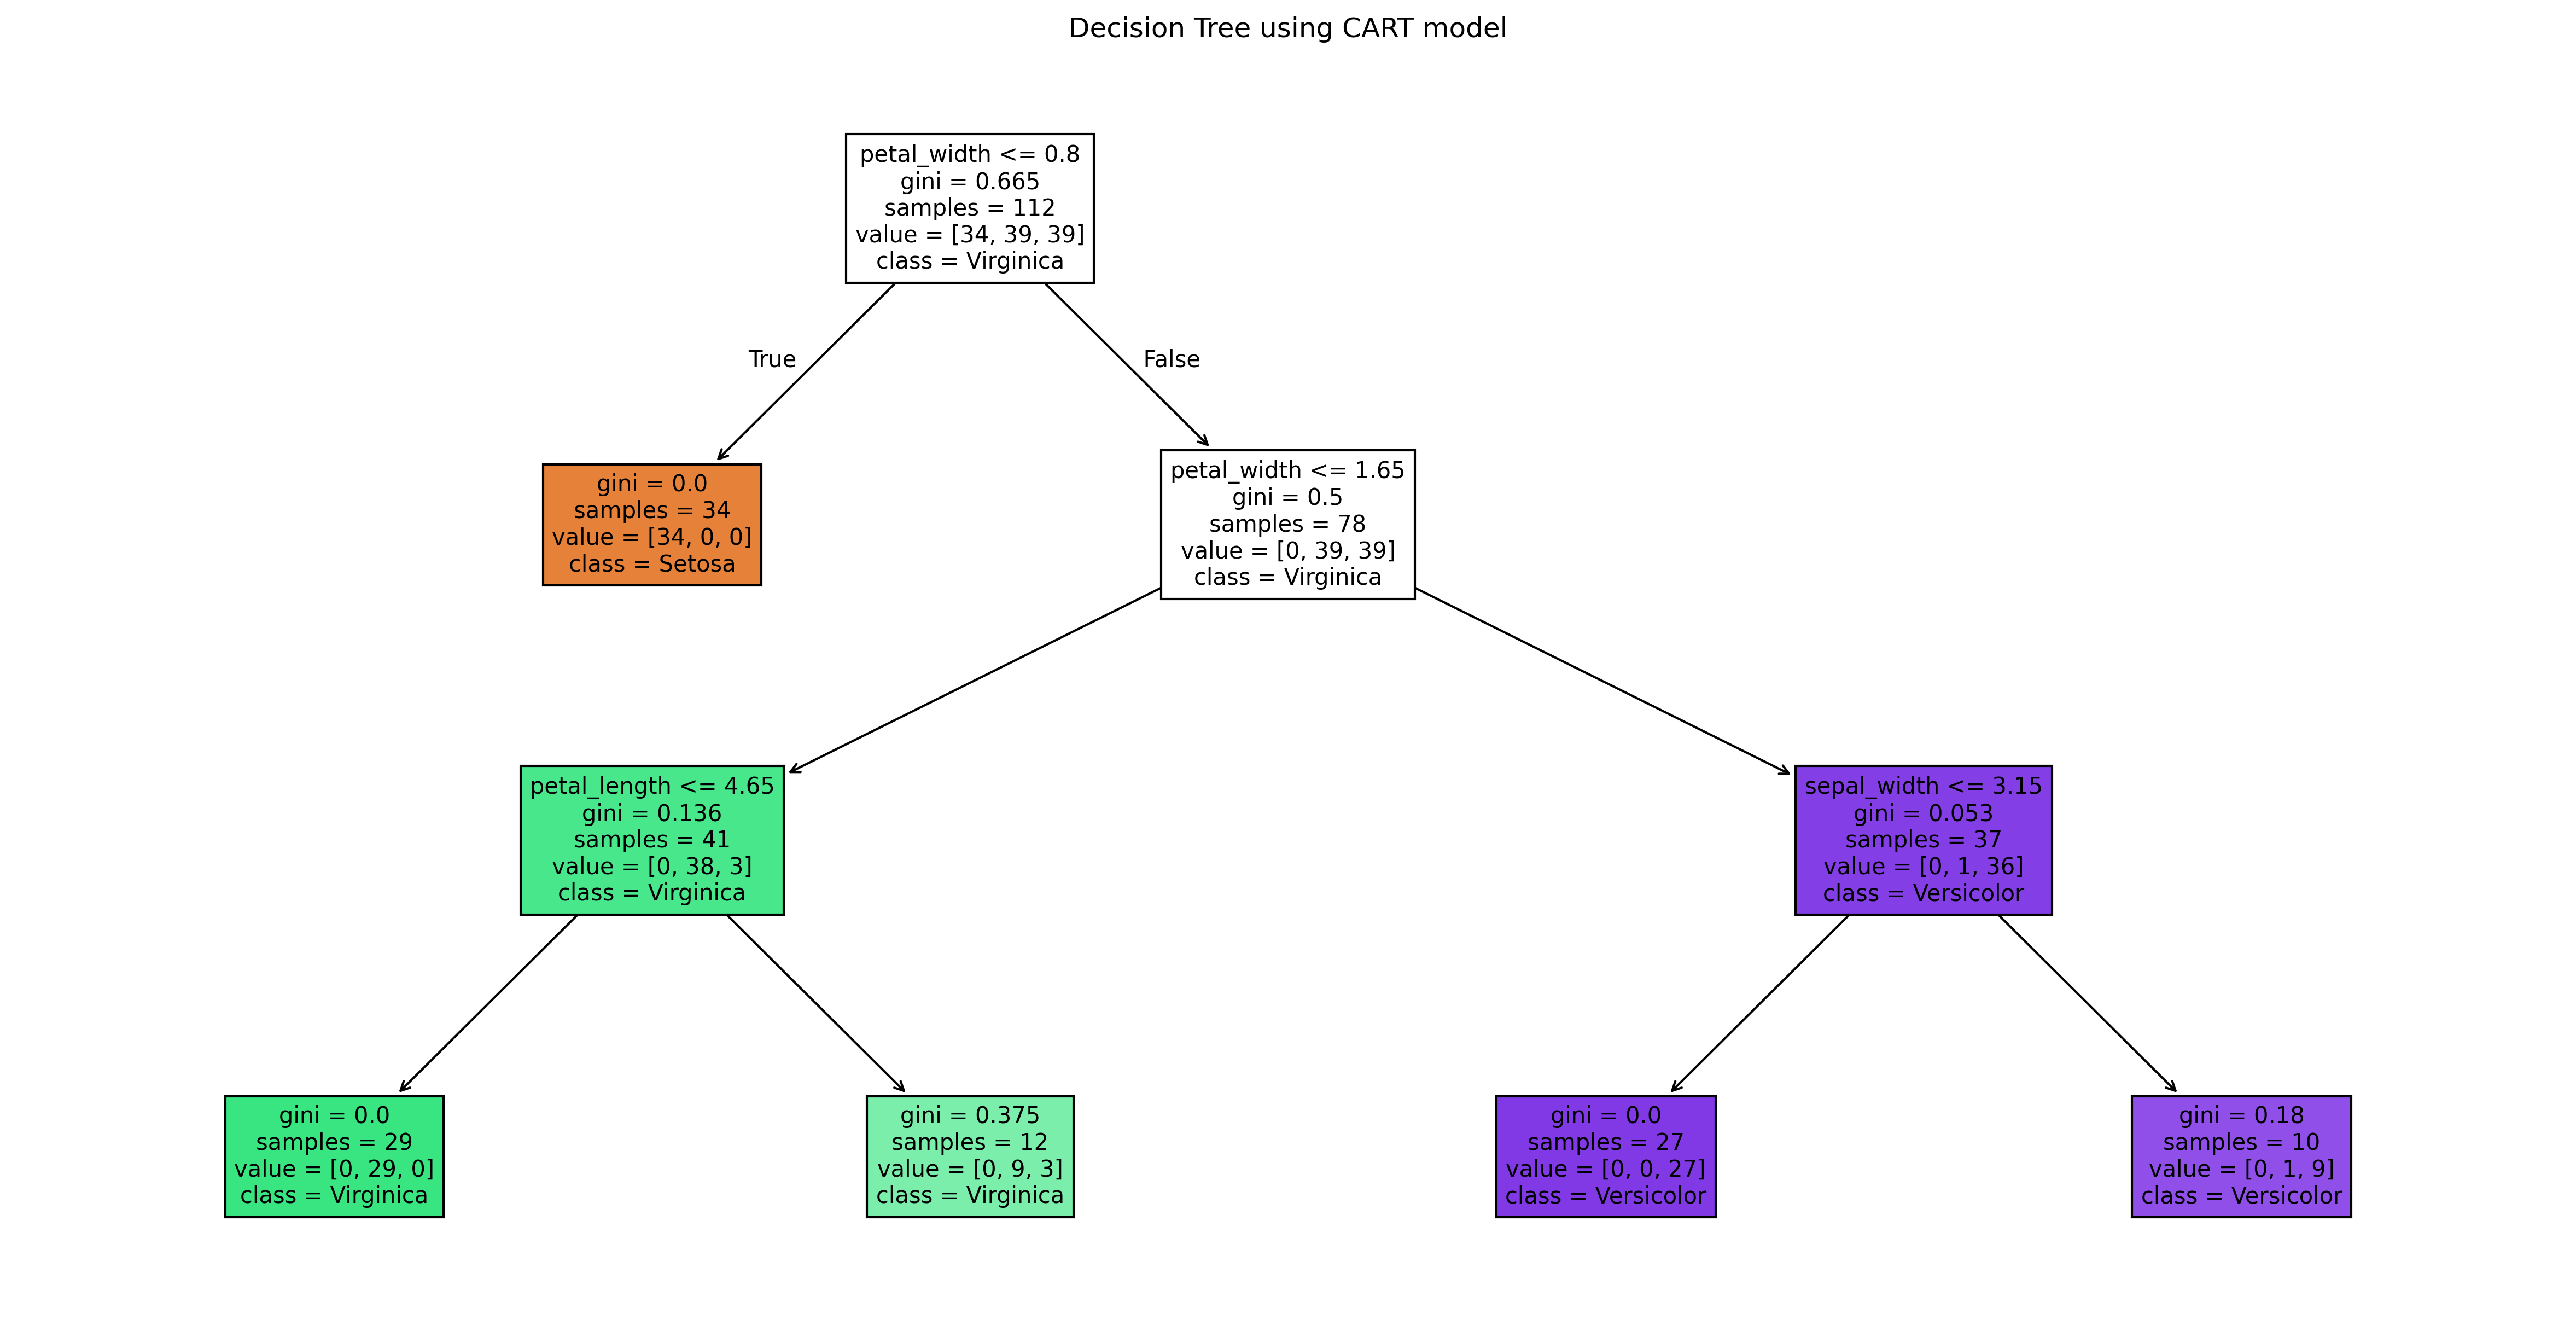

In [93]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10), dpi=300)
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Setosa', "Virginica", "Versicolor"], fontsize=10)
plt.title('Decision Tree using CART model')
plt.savefig("my_tree.png")
plt.show()

### **Commment to the decision tree**
The decision tree shows clearly the 3 classes.
If ghe petal length is lower than 2.45 --> the class is Setosa (40 samples in that node).
If the petal lenght is higher than 2.45 and lower than 4.75 and the sepal width is below 2.55 --> the predicted class is virginica.
If the petal length is above 4.75, the precicte class is Versicolor

## **Alternative model: different values of hyperparameters**



In [98]:
# Model creation and training
tree_model_2 = DecisionTreeClassifier(criterion="gini", min_samples_leaf=20, random_state=12)
tree_model_2.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=12)

In [99]:
#Use the model to make the prediction
y_train_pred=tree_model_2.predict(X_train)
y_test_pred=tree_model_2.predict(X_test)

In [100]:
# Evaluation of accuracy
print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9642857142857143
Test accuracy: 0.9473684210526315


In [101]:
# Classification report for the training dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.93      0.97      0.95        39
   virginica       0.97      0.92      0.95        39

    accuracy                           0.96       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.96      0.96       112



In [102]:
# Classification report for the test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.91      0.91      0.91        11
   virginica       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



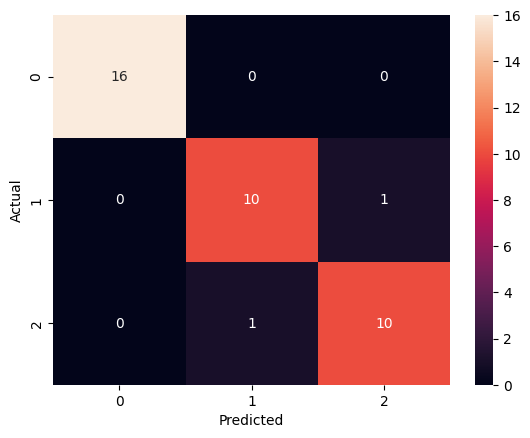

In [103]:
# Building the confusion matrix
cm_2 = confusion_matrix(y_test, y_test_pred)

# Plotting using seaborn to create a heatmap
sns.heatmap(cm_2, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

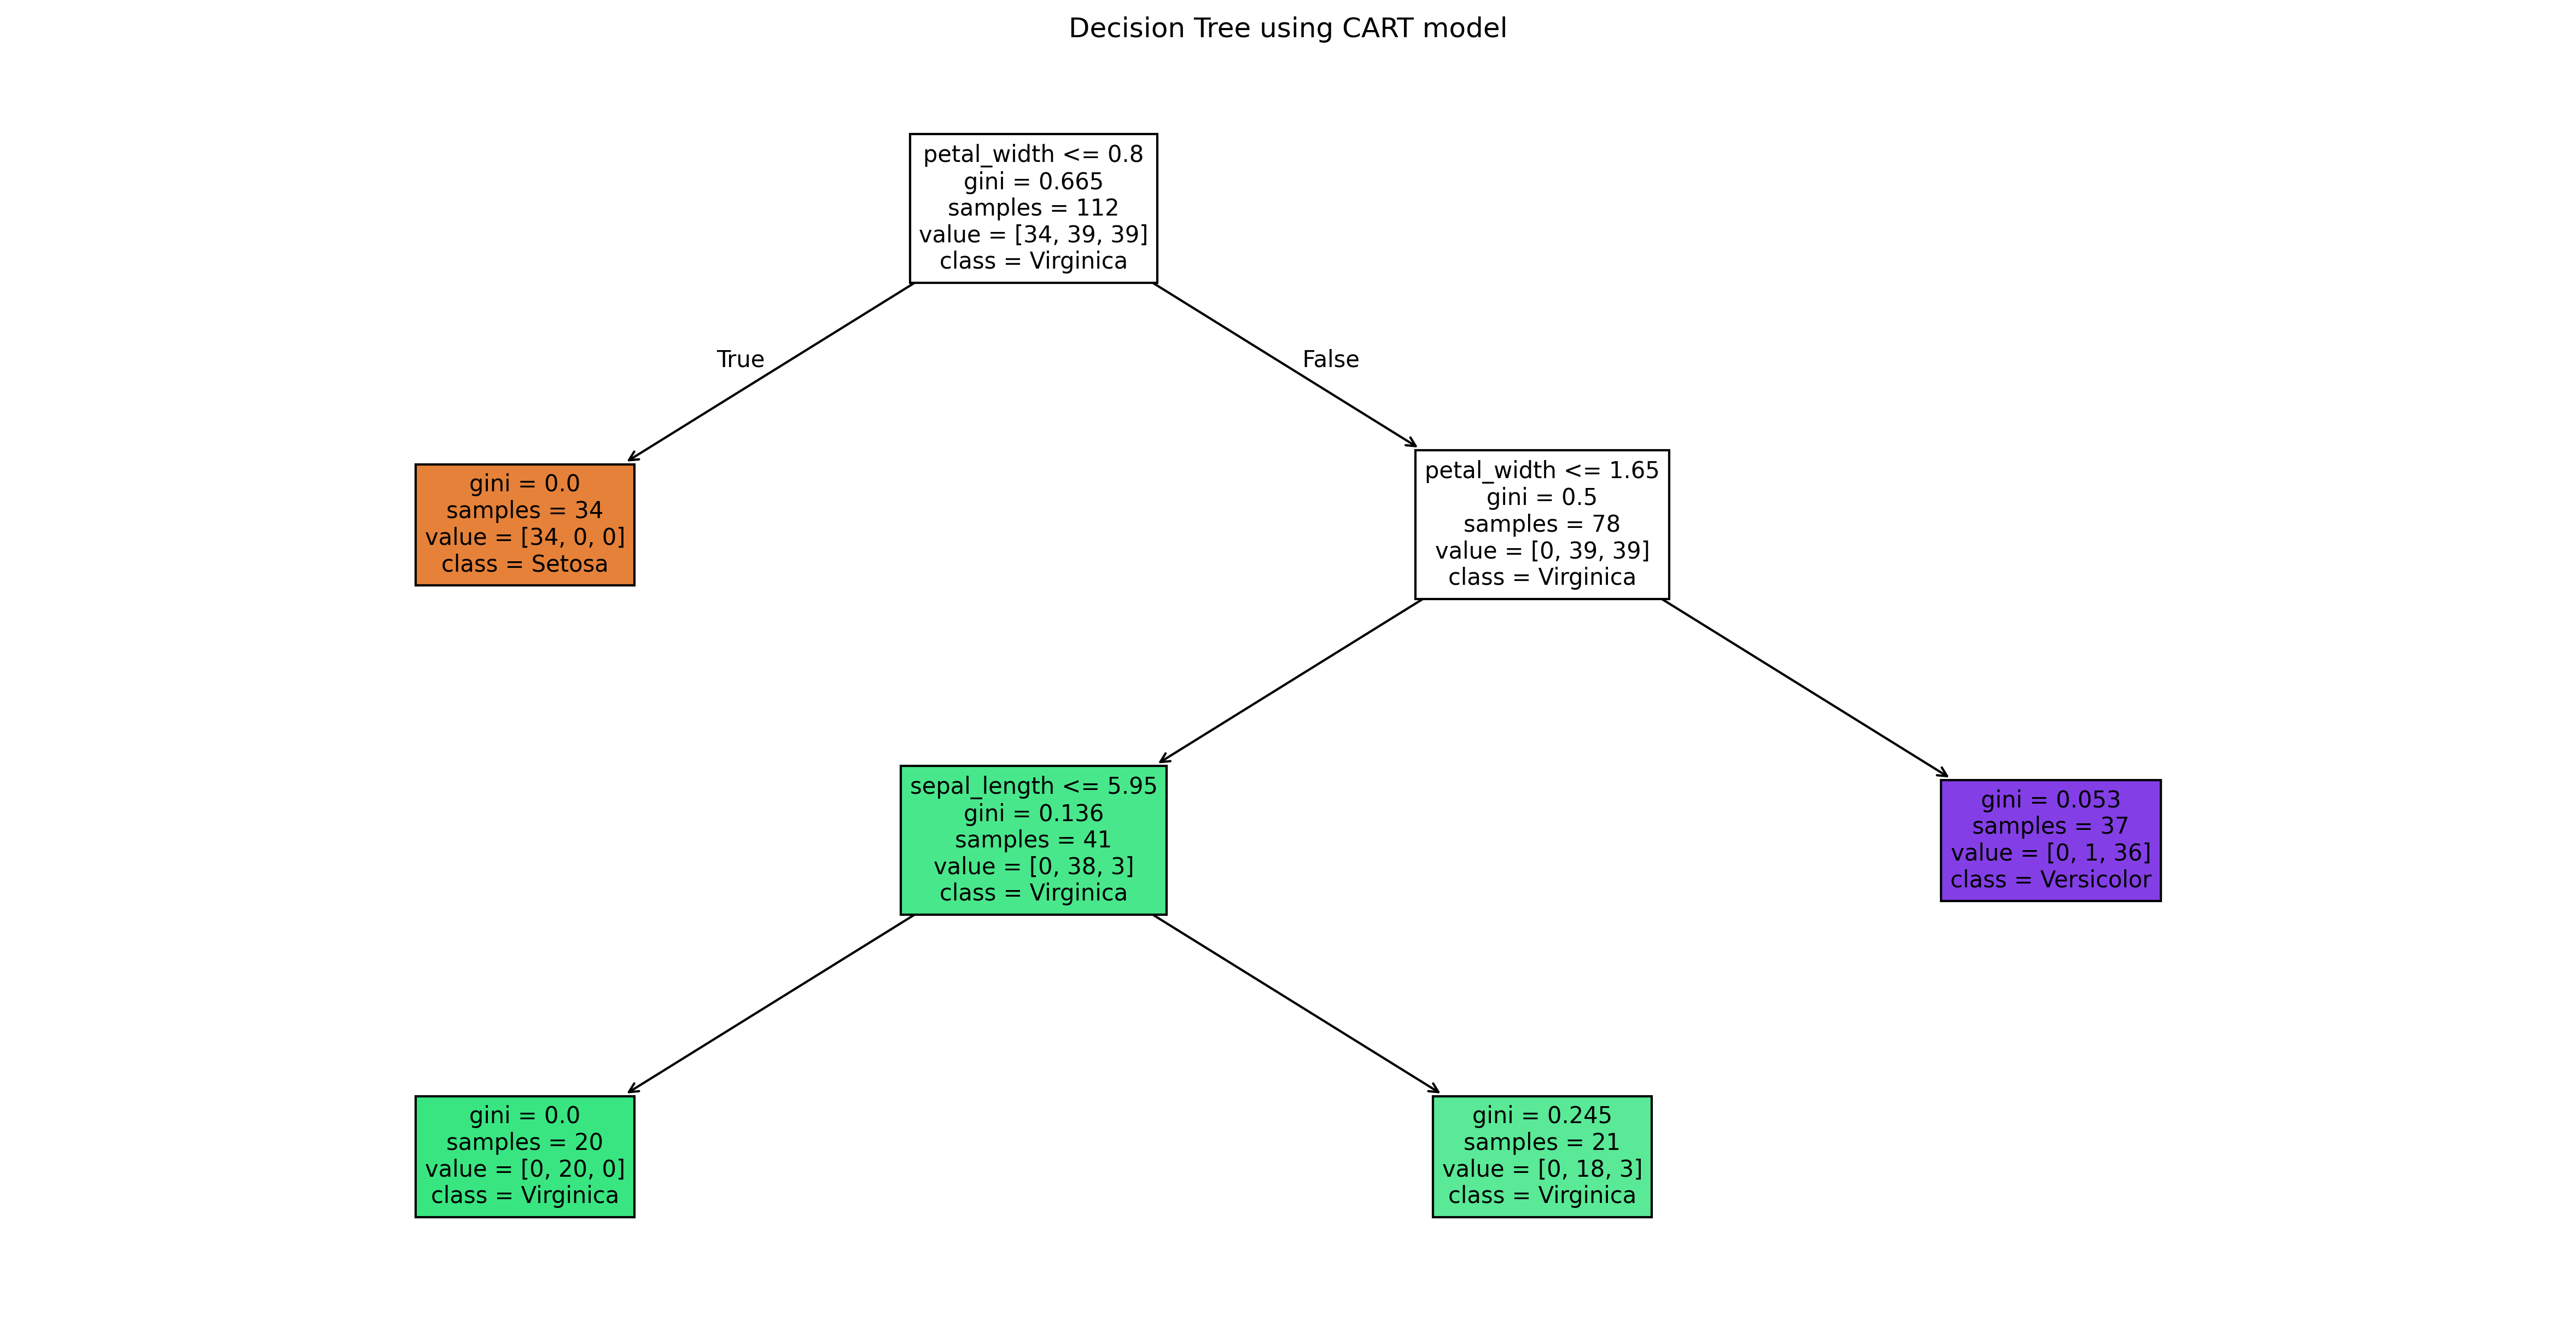

In [104]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10), dpi=300)
plot_tree(tree_model_2, filled=True, feature_names=X.columns, class_names=['Setosa', "Virginica", "Versicolor"], fontsize=10)
plt.title('Decision Tree using CART model')
plt.savefig("my_tree.png")
plt.show()